In [1]:
# importing the required packages for solving the case study

In [64]:
import pandas as pd
import numpy as np

In [3]:
#importing the required datasets

In [83]:
customer = pd.read_csv("Customer.csv")
prod_info = pd.read_csv("prod_cat_info.csv")
transactions = pd.read_csv("Transactions.csv")

In [84]:
d1 = pd.merge(left=transactions,right=customer,left_on='cust_id',right_on="customer_Id",how="left")

In [85]:
Customer_Final = pd.merge(left=d1,right= prod_info, left_on=['prod_subcat_code','prod_cat_code'],right_on=['prod_sub_cat_code','prod_cat_code'],how='left')

In [86]:
Customer_Final.shape

(23053, 17)

In [69]:
Customer_Final.columns # Columns names of the data

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [70]:
Customer_Final.dtypes # datatypes of the columns

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [12]:
Customer_Final.head(10) # Top 10 observations

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [13]:
Customer_Final.tail(10) # bottom 10 observations

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


In [20]:
Customer_Final.select_dtypes(include='float').describe().T.loc[:,["min", "25%", "50%", "75%","max"]]

,min,25%,50%,75%,max
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5
city_code,1.000,3.00,5.00,8.000,10.0


In [29]:
for i in Customer_Final.select_dtypes(include='object').columns:
            print(Customer_Final[i].value_counts())

13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64
27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
              ..
29-01-1976     1
01-05-1980     1
23-06-1988     1
25-06-1985     1
10-06-1972     1
Name: DOB, Length: 3987, dtype: int64
M    11811
F    11233
Name: Gender, dtype: int64
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               10

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

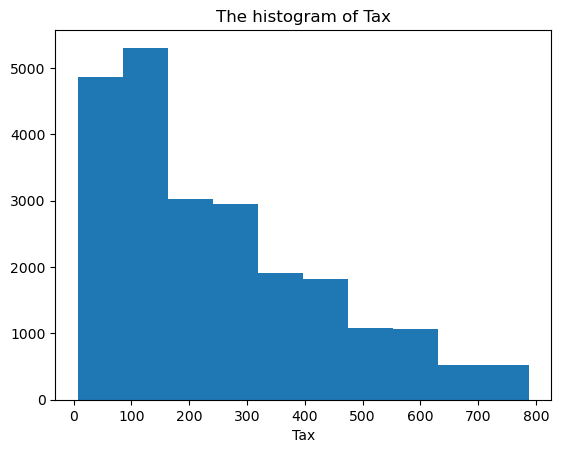

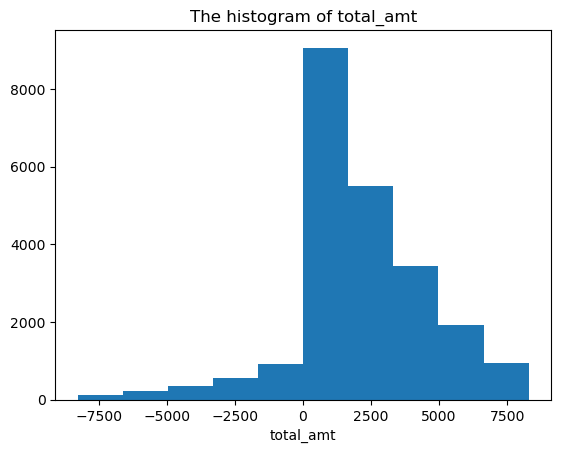

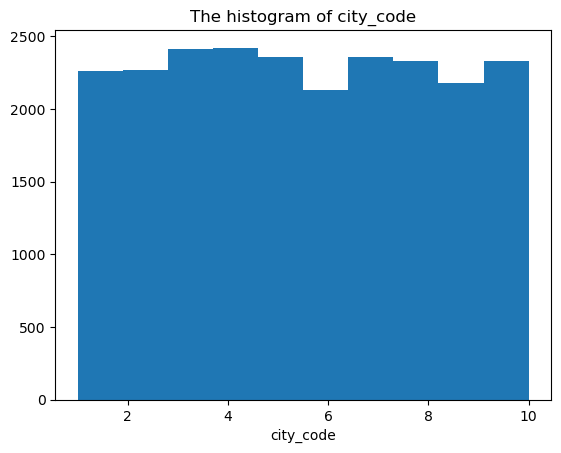

In [34]:
d1 = Customer_Final.select_dtypes(include='float')
for i in d1.columns:
    plt.hist(d1[i],bins=10) 
    plt.xlabel(i)
    plt.title("The histogram of "+str(i))
    plt.show()

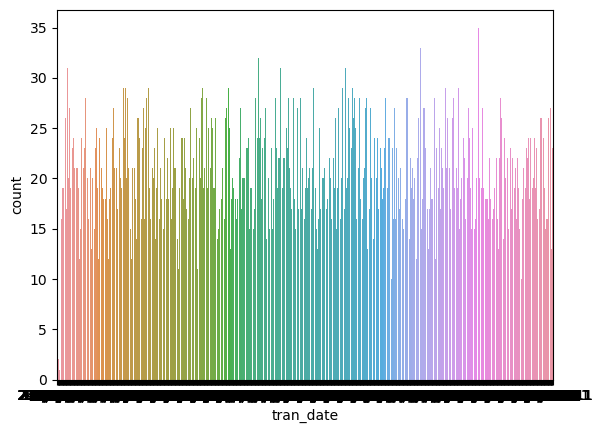

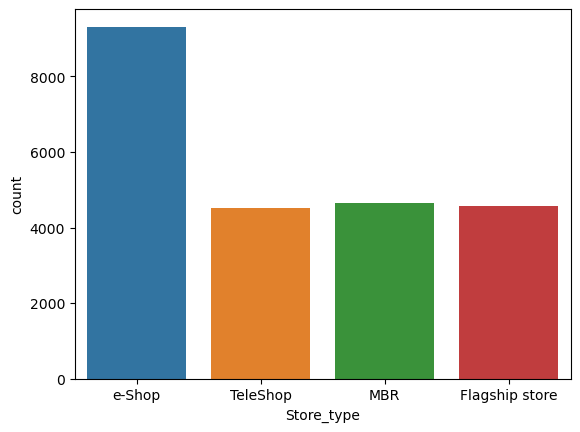

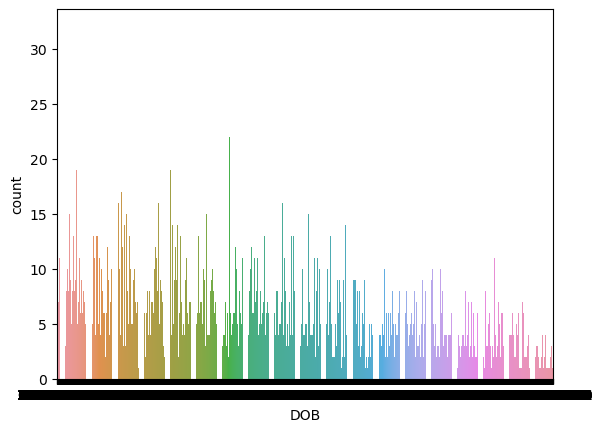

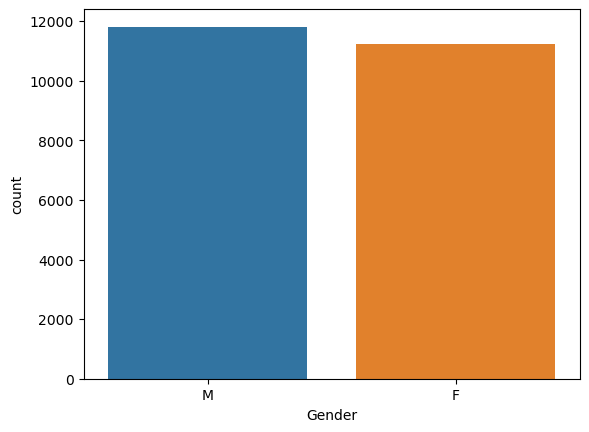

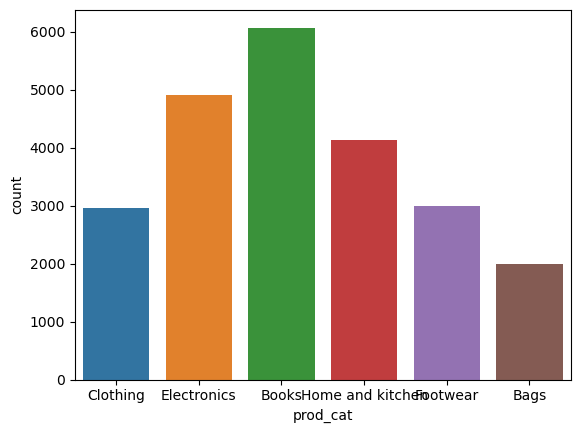

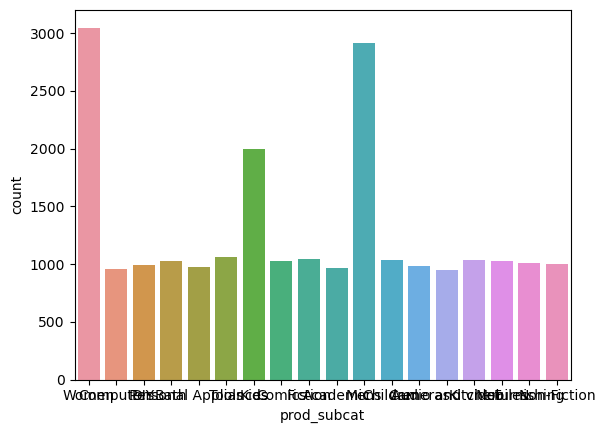

In [35]:
for i in Customer_Final.select_dtypes(include='object').columns:
    sns.countplot(x=i,data=Customer_Final)
    plt.show()

In [87]:
def datetime(x):
    x=x.replace("/","-")
    x = pd.to_datetime(x,format='%d-%m-%Y')
    return x

In [88]:
Customer_Final['tran_date'] = Customer_Final['tran_date'].apply(lambda x: datetime(x))

In [119]:
print("The time range of the transaction date variable in days is: " + str((Customer_Final['tran_date'].max()-Customer_Final['tran_date'].min()).days))

The time range of the transaction date variable in days is: 1130


In [120]:
print("Count of transactions where total amount is negative is: "+ str(Customer_Final.loc[Customer_Final['total_amt']<0,'transaction_id'].nunique()))

Count of transactions where total amount is negative is: 2059


In [99]:
Customer_Final.groupby(['Gender','prod_cat'])['Qty'].sum().reset_index().sort_values(by=['Gender','Qty'],ascending=False)

,Gender,prod_cat,Qty
7,M,Books,7587
9,M,Electronics,6476
11,M,Home and kitchen,5041
8,M,Clothing,3748
10,M,Footwear,3555
6,M,Bags,2346
1,F,Books,7070
3,F,Electronics,5832
5,F,Home and kitchen,4895
4,F,Footwear,3716


In [122]:
df1 = pd.DataFrame(Customer_Final.groupby('city_code')['customer_Id'].count().reset_index()).sort_values(by='customer_Id',ascending=False)
df1

,city_code,customer_Id
3,4.0,2422
2,3.0,2411
4,5.0,2360
6,7.0,2356
9,10.0,2333
7,8.0,2330
1,2.0,2270
0,1.0,2258
8,9.0,2178
5,6.0,2127


In [131]:
list(df1.loc[df1['city_code']==4.0,'customer_Id']/(df1['customer_Id'].sum())*100)[0]

10.509871989585594

In [133]:
print("City code 4 has the maximum number of customers and the percentage of customers from this city are: "+str(list(df1.loc[df1['city_code']==4.0,'customer_Id']/(df1['customer_Id'].sum())*100)[0]))

City code 4 has the maximum number of customers and the percentage of customers from this city are: 10.509871989585594


In [94]:
Customer_Final.groupby('Store_type')[['total_amt','Qty']].agg({'total_amt':sum,'Qty':sum}).reset_index().sort_values(by=['total_amt','Qty'],ascending=False)

,Store_type,total_amt,Qty
3,e-Shop,1.982482e+07,22763
0,Flagship store,9.715688e+06,11133
1,MBR,9.674486e+06,11194
2,TeleShop,9.364781e+06,10984


In [134]:
#e-shop sells the maximum product by value and quantity

In [141]:
df2 = Customer_Final.groupby(['Store_type','prod_cat'])['total_amt'].sum().reset_index()

In [147]:
print("The total amount earned from the electronics and clothing category from the flagship stores are: "+str(df2.loc[((df2['prod_cat']=='Electronics')|(df2['prod_cat']=='Clothing'))&(df2['Store_type']=='Flagship store'),'total_amt'].sum(axis=0)))

The total amount earned from the electronics and clothing category from the flagship stores are: 3409559.27


In [149]:
df3 = Customer_Final.groupby(['Gender','prod_cat'])['total_amt'].sum().reset_index()

In [150]:
print("The total amount earned from the male customers in the electronics category are: "+str(df3.loc[(df3['Gender']=='M')&(df3['prod_cat']=='Electronics'),'total_amt'].sum(axis=0)))

The total amount earned from the male customers in the electronics category are: 5703109.425


In [154]:
df3 = Customer_Final.loc[Customer_Final['total_amt']>=0,:]

In [163]:
df4 = df3.groupby('cust_id')['transaction_id'].nunique().reset_index()

In [164]:
df5 = df4.loc[df4['transaction_id']>=10,:]

In [166]:
print("The number of customers with more than 10 unique transactions are: " +str(df5.shape[0]))

The number of customers with more than 10 unique transactions are: 27


In [167]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [169]:
Customer_Final['DOB'].dtypes

dtype('O')

In [170]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'],format="%d-%m-%Y")

In [171]:
Customer_Final['DOB'].dtypes

dtype('<M8[ns]')

In [175]:
Customer_Final['Year'] = Customer_Final['DOB'].apply(lambda x: pd.to_datetime('today').year-x.year)

In [178]:
df6 = Customer_Final.loc[(Customer_Final['Year']>=25)&(Customer_Final['Year']<=35),:]

In [181]:
df7 = df6.groupby('prod_cat')['total_amt'].sum().reset_index()

In [194]:
print("Total amount spent by the customers aged between 25 and 35 for the electronics and books categories is: "+str(df7.loc[(df7['prod_cat']=='Electronics')|(df7['prod_cat']=='Clothing'),'total_amt'].sum(axis=0)))

Total amount spent by the customers aged between 25 and 35 for the electronics and books categories is: 3715493.99


In [204]:
df8 = df6.loc[(df6['tran_date']>=pd.to_datetime('01-01-2014',format="%d-%m-%Y"))& (df6['tran_date']<=pd.to_datetime('01-03-2014',format="%d-%m-%Y")),:]

In [205]:
print("The total amount spent by customers between 1st Jan 2014 and 1st Mar 2014 is: "+str(df8['total_amt'].sum(axis=0)))

The total amount spent by customers between 1st Jan 2014 and 1st Mar 2014 is: 546350.675
